# Correlation - Wine Dataset

### Objective
The objective of this assignment is to generate visually informative scatterplots and compute correlation coefficients.

## 1. What is correlation?
The main goal of **correlation** analysis is to identify the relationship between random variables and assess its strength (the degree of association).

A **scatterplot** displays sample data points on a two-dimensional plane.

The degree of linear relationship between two variables is measured by the **correlation coefficient** ($\rho$).

The correlation coefficient calculated from sample data is called a **sample correlation coefficient** ($r$) and serves as an estimate of the theoretical correlation coefficient ($\rho$).

**Theoretical Correlation Coefficient ($\rho$)**: 
$$ \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$
where $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.

**Sample Correlation Coefficient (r)**: 
$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $$
where $x_i$ and $y_i$ are the sample values, and $\bar{x}$ and $\bar{y}$ are the sample means of $X$ and $Y$.

## 2. Three most & least correlated variables

### Strong Positive Correlation:
- **flavonids** and **total_phenols** (0.86)
- **od280/od315_of_diluted_wines** and **flavonids** (0.79)
- **od280/od315_of_diluted_wines** and **total_phenols** (0.70)

### Strong Negative Correlation:
- **hue** and **malic_acid** (-0.56)
- **flavonids** and **nonflavanoid_phenols** (-0.54)
- **hue** and **color_intensity** (-0.52)

### No Correlation:
- **ash** and **od280/od315_of_diluted_wines** (0.00)
- **ash** and **proanthocyanins** (0.01)
- **color_intensity** and **proanthocyanins** (-0.03)

## 3. Other observations

- **alcohol** shows weak positive relationships with **magnesium** (0.270798) and **proanthocyanins** (0.136698), and a weak negative relationship with **alcalinity_of_ash** (-0.310235).
- **malic_acid** shows weak positive relationships with **nonflavanoid_phenols** (0.292977) and **alcalinity_of_ash** (0.288500), and rather strong negative relationships with **hue** (-0.561296).
- **color_intensity** shows a weak positive relationship with **proline** (0.316100) and rather strong negative relationship with **hue** (-0.521813).
- **ash** shows weak positive relationships with **alcalinity_of_ash** (0.443367) and **magnesium** (0.286587), and weak negative relationships with **hue** (-0.074667).

In [36]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [37]:
### Load the Wine dataset

df = datasets.load_wine()
wine = pd.DataFrame(df.data, columns=df.feature_names)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# General Correlation

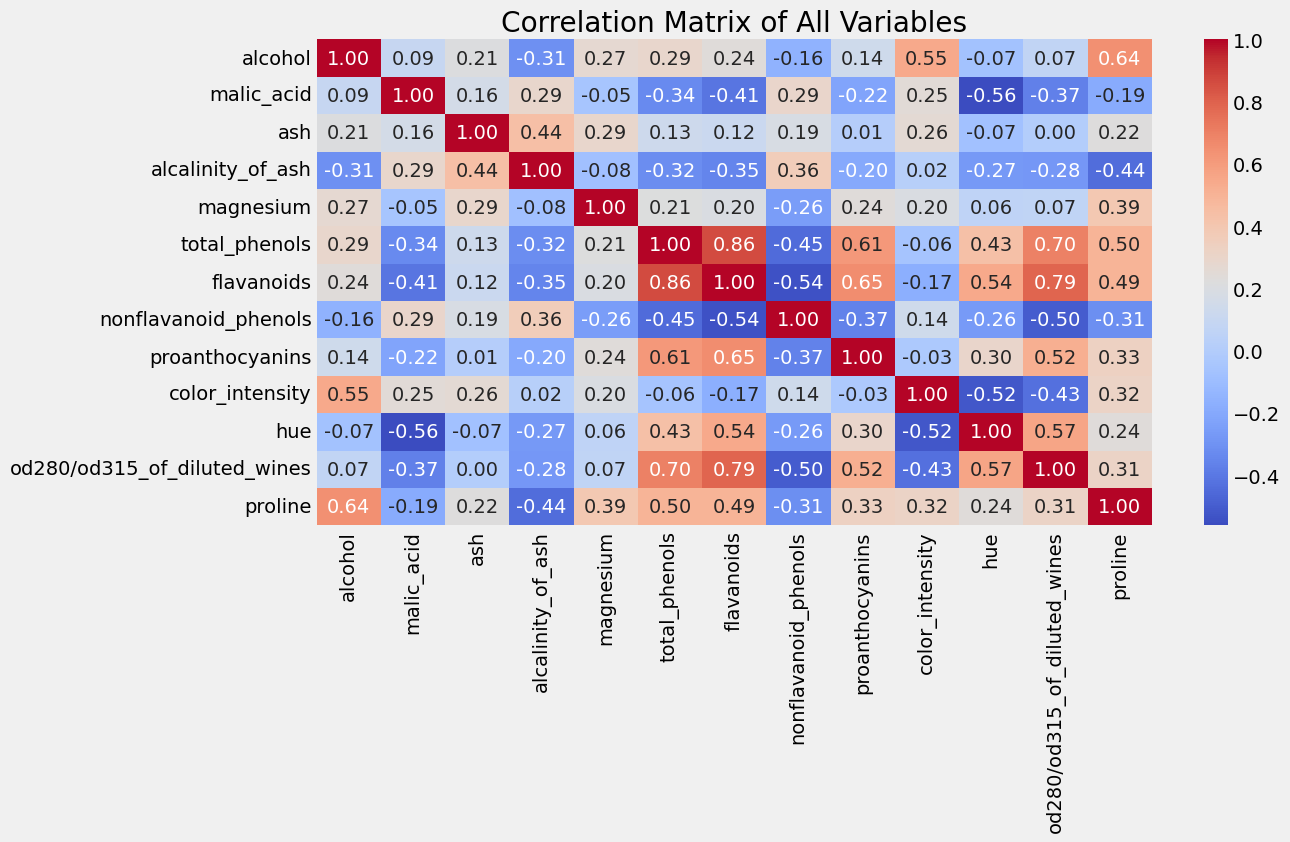

In [38]:
### Correlation matrix of all variables

correlation_matrix = wine.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of All Variables")
plt.show()

# Strong Positive Correlation
### Three pairs of columns with strongest positive correlations:
- **flavonids** and **total_phenols** (0.86)
- **od280/od315_of_diluted_wines** and **flavonids** (0.79)
- **od280/od315_of_diluted_wines** and **total_phenols** (0.70)

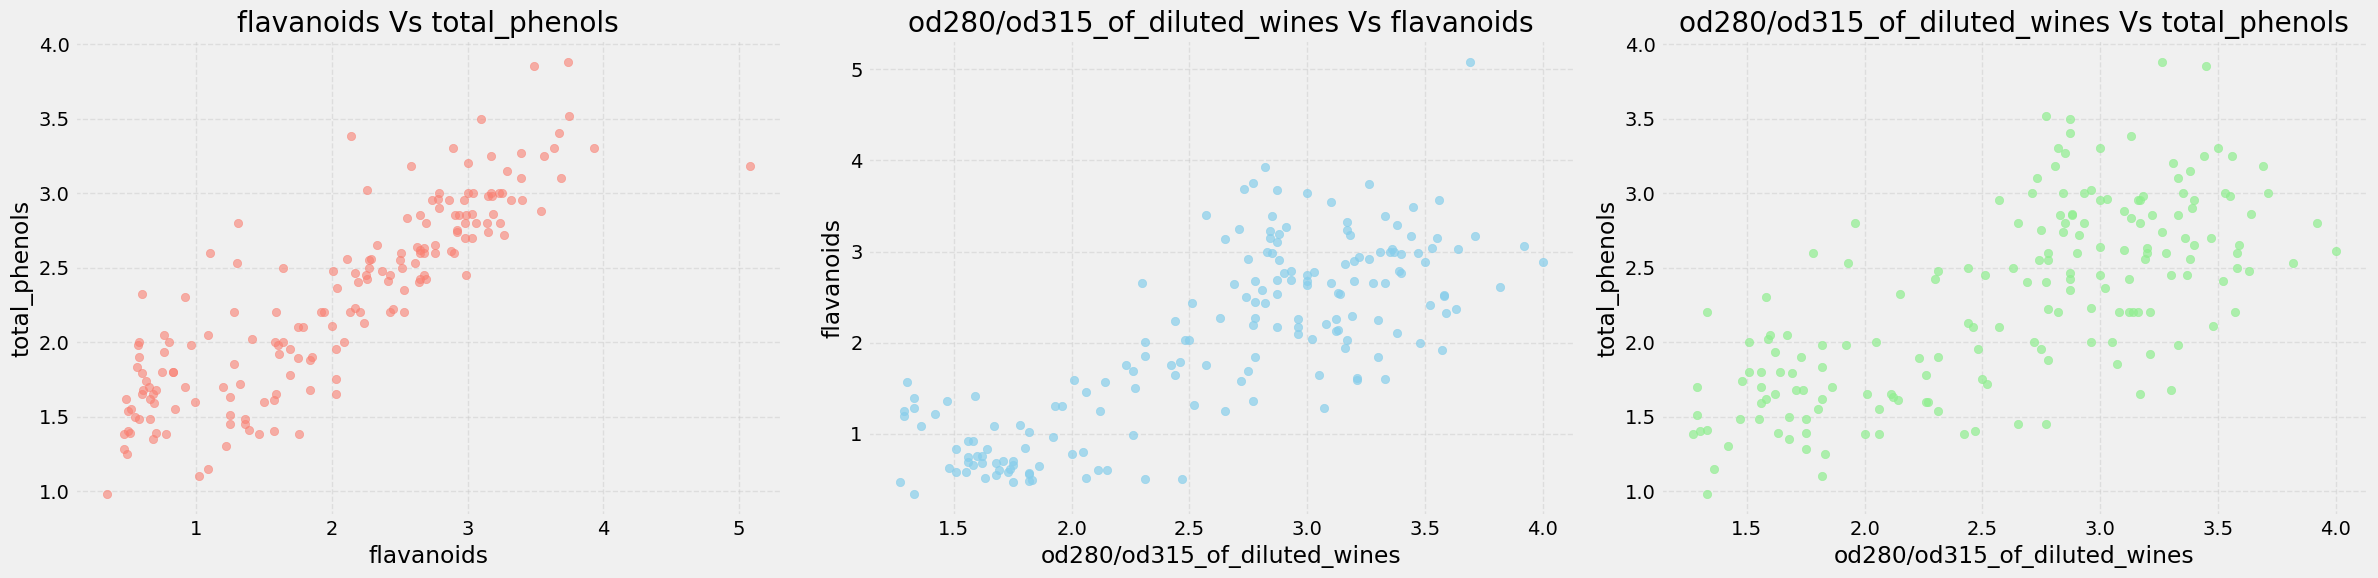

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# flavanoids Vs total_phenols
ax1.scatter(wine['flavanoids'], wine['total_phenols'], c='salmon', marker='o', alpha=0.6)
ax1.set_xlabel('flavanoids')
ax1.set_ylabel('total_phenols')
ax1.set_title('flavanoids Vs total_phenols')
ax1.grid(True, linestyle='--', alpha=0.5)

# od280/od315_of_diluted_wines V flavanoids
ax2.scatter(wine['od280/od315_of_diluted_wines'], wine['flavanoids'], c='skyblue', marker='o', alpha=0.7)
ax2.set_xlabel('od280/od315_of_diluted_wines')
ax2.set_ylabel('flavanoids')
ax2.set_title('od280/od315_of_diluted_wines Vs flavanoids')
ax2.grid(True, linestyle='--', alpha=0.5)

# od280/od315_of_diluted_wines V total_phenols
ax3.scatter(wine['od280/od315_of_diluted_wines'], wine['total_phenols'], c='lightgreen', marker='o', alpha=0.7)
ax3.set_xlabel('od280/od315_of_diluted_wines')
ax3.set_ylabel('total_phenols')
ax3.set_title('od280/od315_of_diluted_wines Vs total_phenols')
ax3.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Strong Negative Correlation
### Three pairs of columns with strongest negative correlations:
- **hue** and **malic_acid** (-0.56)
- **flavonids** and **nonflavanoid_phenols** (-0.54)
- **hue** and **color_intensity** (-0.52)

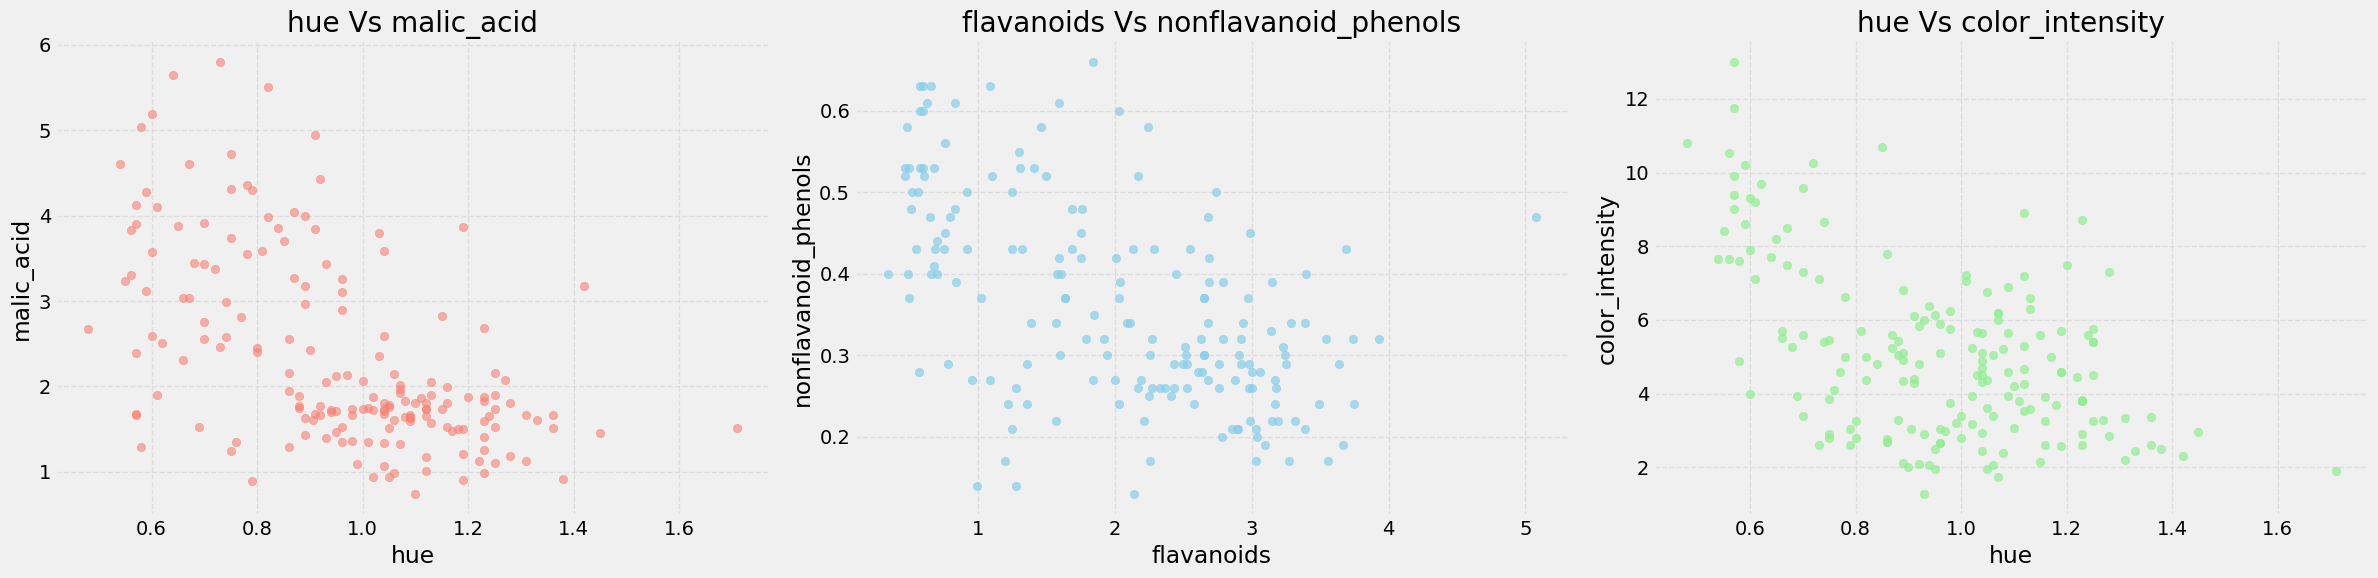

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# hue Vs malic_acid
ax1.scatter(wine['hue'], wine['malic_acid'], c='salmon', marker='o', alpha=0.6)
ax1.set_xlabel('hue')
ax1.set_ylabel('malic_acid')
ax1.set_title('hue Vs malic_acid')
ax1.grid(True, linestyle='--', alpha=0.5)

# flavanoids V nonflavanoid_phenols
ax2.scatter(wine['flavanoids'], wine['nonflavanoid_phenols'], c='skyblue', marker='o', alpha=0.7)
ax2.set_xlabel('flavanoids')
ax2.set_ylabel('nonflavanoid_phenols')
ax2.set_title('flavanoids Vs nonflavanoid_phenols')
ax2.grid(True, linestyle='--', alpha=0.5)

# hue V color_intensity
ax3.scatter(wine['hue'], wine['color_intensity'], c='lightgreen', marker='o', alpha=0.7)
ax3.set_xlabel('hue')
ax3.set_ylabel('color_intensity')
ax3.set_title('hue Vs color_intensity')
ax3.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# No Correlation
### Three pairs of columns with strongest negative correlations:
- **ash** and **od280/od315_of_diluted_wines** (0.00)
- **ash** and **proanthocyanins** (0.01)
- **color_intensity** and **proanthocyanins** (-0.03)

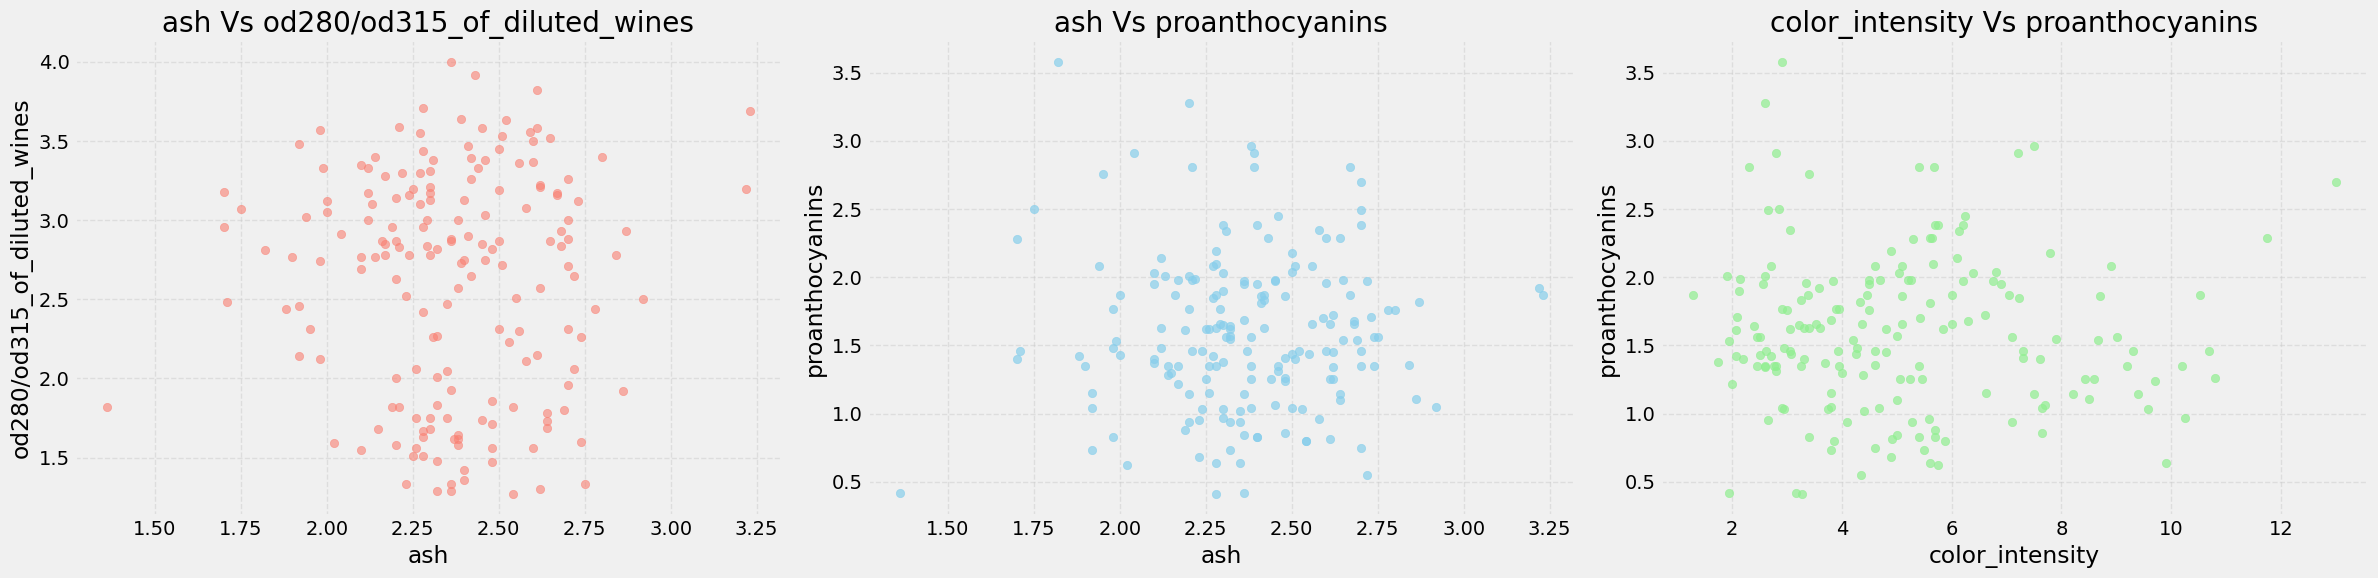

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# ash Vs malic_acid
ax1.scatter(wine['ash'], wine['od280/od315_of_diluted_wines'], c='salmon', marker='o', alpha=0.6)
ax1.set_xlabel('ash')
ax1.set_ylabel('od280/od315_of_diluted_wines')
ax1.set_title('ash Vs od280/od315_of_diluted_wines')
ax1.grid(True, linestyle='--', alpha=0.5)

# ash V proanthocyanins
ax2.scatter(wine['ash'], wine['proanthocyanins'], c='skyblue', marker='o', alpha=0.7)
ax2.set_xlabel('ash')
ax2.set_ylabel('proanthocyanins')
ax2.set_title('ash Vs proanthocyanins')
ax2.grid(True, linestyle='--', alpha=0.5)

# color_intensity V proanthocyanins
ax3.scatter(wine['color_intensity'], wine['proanthocyanins'], c='lightgreen', marker='o', alpha=0.7)
ax3.set_xlabel('color_intensity')
ax3.set_ylabel('proanthocyanins')
ax3.set_title('color_intensity Vs proanthocyanins')
ax3.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()